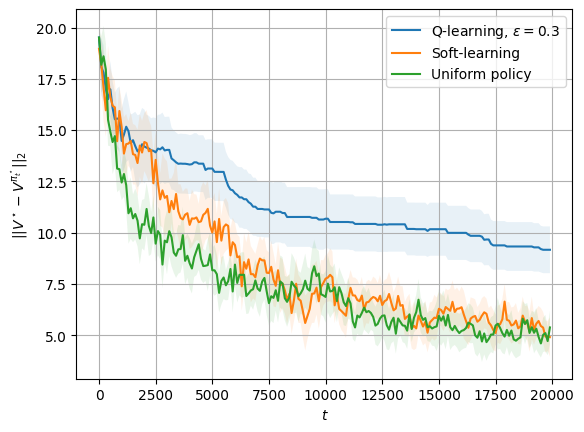

In [161]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable
def CE(x, c=1.96):
    return x.mean(0), c * x.std(0) / np.sqrt(x.shape[0])   
        
with open(f'navcon_q_comparison_S{10}_A{15}_final.pkl', 'rb') as f:
    data = pickle.load(f)
    
with open(f'navcon_q_comparison_S{10}_A{15}_final2.pkl', 'rb') as f:
    data2 = pickle.load(f)

# with open(f'navcon_q_comparison_S{10}_A{15}_final3.pkl', 'rb') as f:
#     data = pickle.load(f)
    
res_q_learning = data2['res_q_learning']
#res_mf_learning = data['res_mf_learning']
#res_mfc_learning = data['res_mfc_learning']
res_soft_learning = data2['res_soft_learning']
res_uniform_learning = data2['res_uniform_learning']
#res_mf_learning_bonus = data['res_mf_learning_bonus']

res_q_learning = np.array([x[1] for x in res_q_learning])
#res_mf_learning = np.array([x[2] for x in res_mf_learning])
#res_mfc_learning = np.array([x[2] for x in res_mfc_learning])
res_soft_learning = np.array([x[2] for x in res_soft_learning])
res_uniform_learning = np.array([x[1] for x in res_uniform_learning])
#res_mf_learning_bonus = np.array([x[2] for x in res_mf_learning_bonus])

data = [
    (res_q_learning, r'Q-learning, $\varepsilon=0.3$'),
    #(res_mf_learning, r'$\omega_{gen}$, $\varepsilon=0.3$'),
    #(res_mf_learning_bonus, r'$\omega_{gen}$, $\varepsilon=0.3$ bonus'),
    #(res_mfc_learning, r'$\omega_{nc}$, $\varepsilon=0.3$'),
    (res_soft_learning, r'Soft-learning'),
    (res_uniform_learning, r'Uniform policy')
]

for val, label in data:
    x = val.mean(0)[:, 0]
    mu, ce = CE(val[:,:, 1])
    
    plt.plot(x, mu, label=label)
    plt.fill_between(x, mu-ce, mu+ce, alpha=0.1)
# plt.plot(res_mf_learning.mean(0)[:,0], res_mf_learning.mean(0)[:, 1], label='gen')
# plt.plot(res_mfc_learning.mean(0)[:,0], res_mfc_learning.mean(0)[:, 1], label='nav_con')
# plt.plot(res_soft_learning.mean(0)[:,0], res_soft_learning.mean(0)[:, 1], label='soft 1')
plt.grid()
plt.xlabel('$t$')
plt.ylabel('$\||V^\star- V^{\pi_t^\star}\||_2$')
plt.legend()
plt.show()

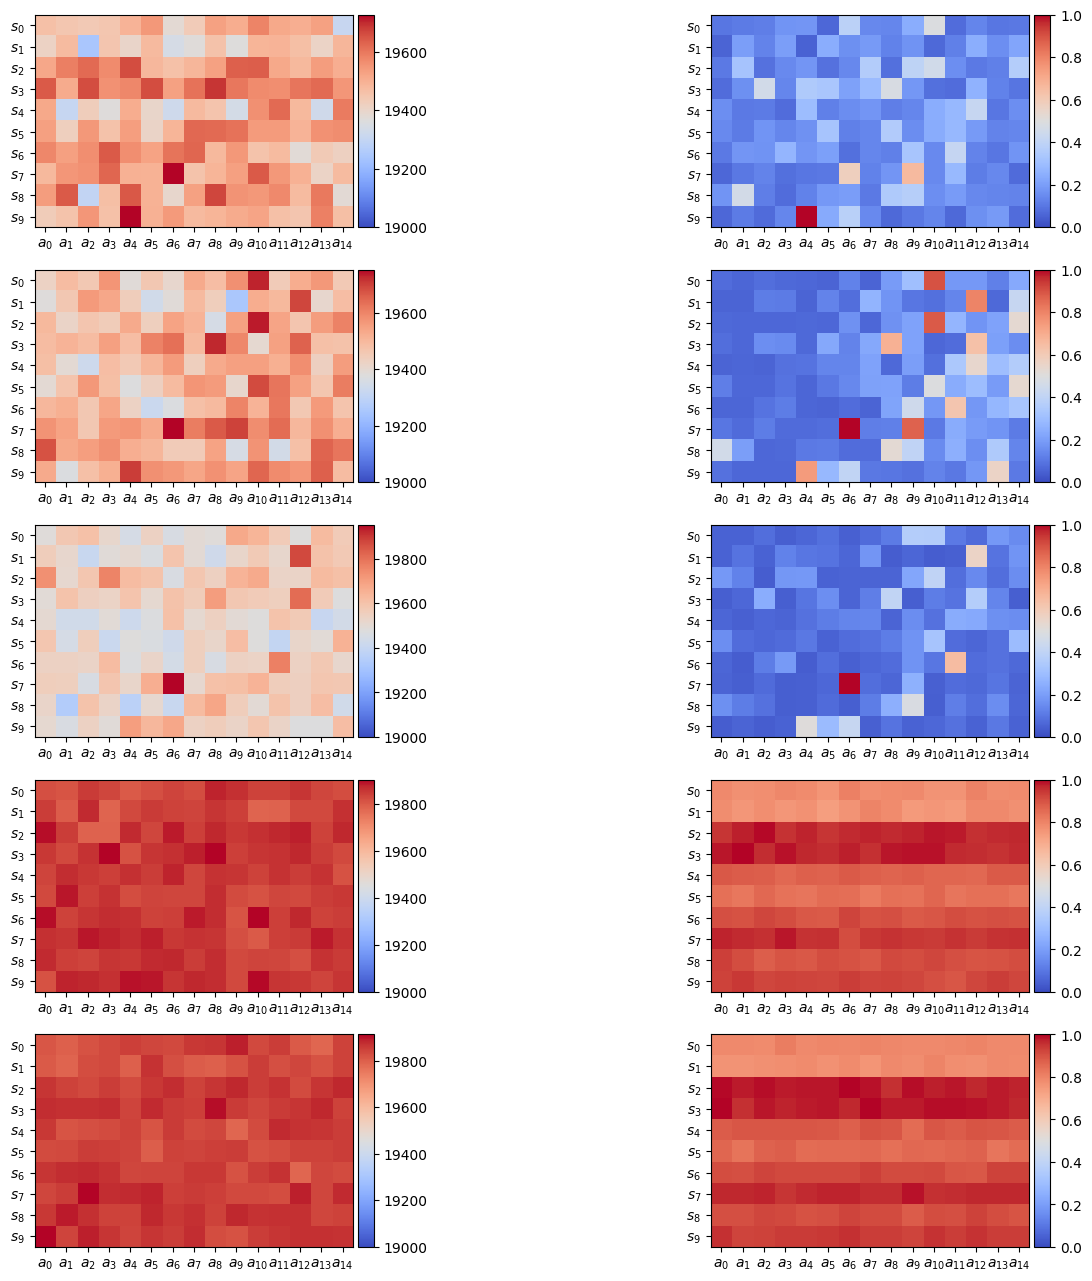

In [130]:
with open(f'navcon_q_comparison_S{10}_A{15}_final.pkl', 'rb') as f:
    data = pickle.load(f)

res_q_learning = data['res_q_learning']
res_mf_learning = data['res_mf_learning']
res_mfc_learning = data['res_mfc_learning']
res_soft_learning = data['res_soft_learning']
res_uniform_learning = data2['res_uniform_learning']

res_q_learning_last = np.array([x[-1] for x in res_q_learning])
res_mf_learning_last = np.array([x[-1] for x in res_mf_learning])
res_mfc_learning_last = np.array([x[-1] for x in res_mfc_learning])
res_soft_learning_last = np.array([x[-1] for x in res_soft_learning])
res_uniform_learning_last = np.array([x[-1] for x in res_uniform_learning])


res_q_learning_freq = np.array([x[-2] for x in res_q_learning])
res_mf_learning_freq = np.array([x[-2] for x in res_mf_learning])
res_mfc_learning_freq = np.array([x[-2] for x in res_mfc_learning])
res_soft_learning_freq = np.array([x[-2] for x in res_soft_learning])
res_uniform_learning_freq = np.array([x[-2] for x in res_uniform_learning])

def print_heatmap(data):
    columns_labels = [f'$s_{x}$' for x in range(10)]
    rows_labels = ['$a_{' +  str(x) + '}$' for x in range(15)]
    

    fig, ax = plt.subplots(len(data), 2, figsize=(16,16))
    id = 0
    for values_last, values_freq, label in data:
        vmax = np.max(values_last)
        im = ax[id,0].imshow(values_last, cmap='coolwarm',vmin = 19000, vmax = vmax)
        ax[id,0].set_yticks(np.arange(10), labels=columns_labels)
        ax[id,0].set_xticks(np.arange(15), labels=rows_labels)
        divider = make_axes_locatable(ax[id,0])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
        
        
        vmax = np.max(values_freq)
        im = ax[id,1].imshow(values_freq / vmax, cmap='coolwarm',vmin = 0, vmax = 1)
        ax[id,1].set_yticks(np.arange(10), labels=columns_labels)
        ax[id,1].set_xticks(np.arange(15), labels=rows_labels)
        divider = make_axes_locatable(ax[id,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)
        
        
        #ax[id].set_title(label)
        
        id += 1


data = [
    (res_q_learning_last.mean(0), res_q_learning_freq.mean(0), r'Q-learning, $\varepsilon=0.3$'),
    (res_mf_learning_last.mean(0), res_mf_learning_freq.mean(0), r'$\omega_{gen}$, $\varepsilon=0.3$'),
    (res_mfc_learning_last.mean(0), res_mfc_learning_freq.mean(0), r'$\omega_{nc}$, $\varepsilon=0.3$'),
    (res_soft_learning_last.mean(0), res_soft_learning_freq.mean(0), r'Soft-learning'),
    (res_uniform_learning_last.mean(0), res_uniform_learning_freq.mean(0), r'Uniform-learning')
]



print_heatmap(data)

In [132]:
NS=10
NA=15
from new_mdp_description import MDPDescription2
P = np.random.dirichlet(np.ones(NS), size=(NS, NA))
R = np.random.dirichlet(np.ones(NS), size=(NS, NA))
k = 1
gamma = 0.99
eta1 = 0.5
eta2 = 0.6
eta3 = 0.7
eps = 0.3
theta = 1
T = 20000
mdp = MDPDescription2(P, R, gamma, 1)
mdp.Q_greedy

array([[15.59948675, 15.51179981, 15.51450163, 15.52229621, 15.49016522,
        15.51184191, 15.56208273, 15.5341107 , 15.47241105, 15.47484401,
        15.51676688, 15.53723085, 15.4760773 , 15.53087655, 15.55558227],
       [15.5182949 , 15.49673063, 15.55571371, 15.57541928, 15.50402109,
        15.57040772, 15.53549045, 15.52115866, 15.53802795, 15.56118542,
        15.54705317, 15.56287866, 15.51446408, 15.50618718, 15.58109824],
       [15.50614861, 15.48986957, 15.54484242, 15.5229224 , 15.48820598,
        15.48678035, 15.6133557 , 15.57526948, 15.49851761, 15.52069458,
        15.51181168, 15.51529764, 15.62142688, 15.53391857, 15.47612655],
       [15.47711188, 15.50836304, 15.57487763, 15.54966195, 15.56191522,
        15.56296175, 15.51068796, 15.49294395, 15.47146903, 15.53144761,
        15.52884956, 15.52697575, 15.48543915, 15.55812968, 15.52919025],
       [15.52396848, 15.53075637, 15.54014758, 15.53602092, 15.49183125,
        15.53671198, 15.52301721, 15.46391107, 

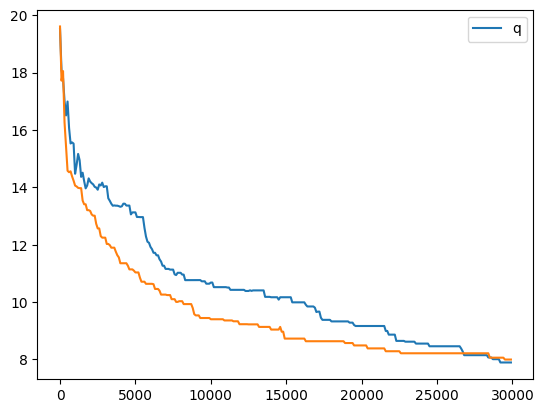

In [13]:
with open(f'navcon_q_comparison_S{10}_A{15}.pkl', 'rb') as f:
    data = pickle.load(f)
    
res_q_learning = data['res_q_learning']
res_mf_learning = data['res_mf_learning']
    


res_q_learning = np.array([x[1] for x in res_q_learning])
res_mf_learning = np.array([x[2] for x in res_mf_learning])

plt.plot(res_q_learning.mean(0)[:,0], res_q_learning.mean(0)[:, 1], label='q')
plt.plot(res_mf_learning.mean(0)[:,0], res_mf_learning.mean(0)[:, 1])
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.savefig('q_vs_gen.pdf')
plt.show()

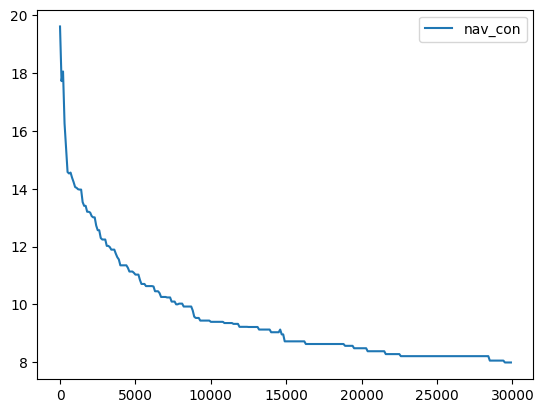

In [12]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

        
        
with open(f'navcon_q_comparison_S{10}_A{5}.pkl', 'rb') as f:
    data = pickle.load(f)
    
res_mfc_learning = data['res_mf_learning']
    


res_mfc_learning = np.array([x[2] for x in res_mfc_learning])

plt.plot(res_mf_learning.mean(0)[:,0], res_mf_learning.mean(0)[:, 1], label='nav_con')
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.show()